# LIBRARIES AND PACKAGES 

In [1]:
! pip install statsmodels
! pip install holidays
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt



# DATA CLEANING

In [2]:
pizza_sale_df=pd.read_csv(r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE PROJECT 5(Dominos)\Pizza_Sale - pizza_sales.csv')

In [3]:
pizza_sale_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
pizza_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [5]:
pizza_sale_df.dropna(axis=0,inplace=True)

In [6]:
pizza_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48554 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48554 non-null  int64  
 1   order_id           48554 non-null  int64  
 2   pizza_name_id      48554 non-null  object 
 3   quantity           48554 non-null  int64  
 4   order_date         48554 non-null  object 
 5   order_time         48554 non-null  object 
 6   unit_price         48554 non-null  float64
 7   total_price        48554 non-null  float64
 8   pizza_size         48554 non-null  object 
 9   pizza_category     48554 non-null  object 
 10  pizza_ingredients  48554 non-null  object 
 11  pizza_name         48554 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.8+ MB


In [7]:
# Step 1: Replace dashes with slashes to unify date format
pizza_sale_df['order_date'] = pizza_sale_df['order_date'].str.replace('-', '/', regex=False)

# Step 2: Attempt to convert 'order_date' to datetime again
pizza_sale_df['order_date'] = pd.to_datetime(pizza_sale_df['order_date'], dayfirst=True, errors='coerce')

# Step 3: Check how many null values are there after the conversion
null_dates_count = pizza_sale_df['order_date'].isnull().sum()

# Step 4: Format the valid dates back to d/m/Y
pizza_sale_df['order_date'] = pizza_sale_df['order_date'].dt.strftime('%d/%m/%Y')

# Display the updated DataFrame structure and check null counts
print(pizza_sale_df[['order_date', 'order_time']].head())
print(f"Null dates after conversion: {null_dates_count}")



# Convert 'order_time' to proper time format (H:M:S)
pizza_sale_df['order_time'] = pd.to_datetime(pizza_sale_df['order_time'], format='%H:%M:%S', errors='coerce').dt.time

   order_date order_time
0  01/01/2015   11:38:36
1  01/01/2015   11:57:40
2  01/01/2015   11:57:40
3  01/01/2015   11:57:40
4  01/01/2015   11:57:40
Null dates after conversion: 0


In [8]:
pizza_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48554 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48554 non-null  int64  
 1   order_id           48554 non-null  int64  
 2   pizza_name_id      48554 non-null  object 
 3   quantity           48554 non-null  int64  
 4   order_date         48554 non-null  object 
 5   order_time         48554 non-null  object 
 6   unit_price         48554 non-null  float64
 7   total_price        48554 non-null  float64
 8   pizza_size         48554 non-null  object 
 9   pizza_category     48554 non-null  object 
 10  pizza_ingredients  48554 non-null  object 
 11  pizza_name         48554 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.8+ MB


In [9]:
Pizza_ingre_df=pd.read_csv(r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE PROJECT 5(Dominos)\Pizza_ingredients - Pizza_ingredients.csv')

In [10]:
Pizza_ingre_df

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [11]:
Pizza_ingre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [12]:
Pizza_ingre_df.dropna(axis=0,inplace=True)

In [13]:
pizza_data=pd.merge(pizza_sale_df,Pizza_ingre_df,on='pizza_name_id',how='inner')


In [14]:
pizza_data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients_x,pizza_name_x,pizza_name_y,pizza_ingredients_y,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,01/01/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Pineapple,30.0
1,1,1,hawaiian_m,1,01/01/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Mozzarella Cheese,20.0
2,2,2,classic_dlx_m,1,01/01/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Pepperoni,40.0
3,2,2,classic_dlx_m,1,01/01/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Mushrooms,40.0
4,2,2,classic_dlx_m,1,01/01/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Red Onions,40.0


In [15]:
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264380 entries, 0 to 264379
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pizza_id             264380 non-null  int64  
 1   order_id             264380 non-null  int64  
 2   pizza_name_id        264380 non-null  object 
 3   quantity             264380 non-null  int64  
 4   order_date           264380 non-null  object 
 5   order_time           264380 non-null  object 
 6   unit_price           264380 non-null  float64
 7   total_price          264380 non-null  float64
 8   pizza_size           264380 non-null  object 
 9   pizza_category       264380 non-null  object 
 10  pizza_ingredients_x  264380 non-null  object 
 11  pizza_name_x         264380 non-null  object 
 12  pizza_name_y         264380 non-null  object 
 13  pizza_ingredients_y  264380 non-null  object 
 14  Items_Qty_In_Grams   264380 non-null  float64
dtypes: float64(3), in

In [16]:
# Drop the duplicated columns (e.g., 'pizza_name_y' and 'pizza_ingredients_y')
cleaned_df = pizza_data.drop(['pizza_name_y', 'pizza_ingredients_y'], axis=1)

# Optionally, rename the remaining columns to remove the '_x' suffix for clarity
cleaned_df = cleaned_df.rename(columns={
    'pizza_name_x': 'pizza_name',
    'pizza_ingredients_x': 'pizza_ingredients'
})

# Check the cleaned DataFrame
print(cleaned_df.info())
print(cleaned_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264380 entries, 0 to 264379
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pizza_id            264380 non-null  int64  
 1   order_id            264380 non-null  int64  
 2   pizza_name_id       264380 non-null  object 
 3   quantity            264380 non-null  int64  
 4   order_date          264380 non-null  object 
 5   order_time          264380 non-null  object 
 6   unit_price          264380 non-null  float64
 7   total_price         264380 non-null  float64
 8   pizza_size          264380 non-null  object 
 9   pizza_category      264380 non-null  object 
 10  pizza_ingredients   264380 non-null  object 
 11  pizza_name          264380 non-null  object 
 12  Items_Qty_In_Grams  264380 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 26.2+ MB
None
   pizza_id  order_id  pizza_name_id  quantity  order_date order_time  

In [17]:
# Drop duplicate rows based on relevant columns (excluding 'Items_Qty_In_Grams' if you want unique entries by orders)
cleaned_df = cleaned_df.drop_duplicates(subset=['pizza_id', 'order_id', 'pizza_name_id', 'order_date', 'order_time'])

# Check the cleaned DataFrame for duplicates
print(cleaned_df.info())
print(cleaned_df.head())

cleaned_df.to_csv('pizza_final.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 48554 entries, 0 to 264374
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_id            48554 non-null  int64  
 1   order_id            48554 non-null  int64  
 2   pizza_name_id       48554 non-null  object 
 3   quantity            48554 non-null  int64  
 4   order_date          48554 non-null  object 
 5   order_time          48554 non-null  object 
 6   unit_price          48554 non-null  float64
 7   total_price         48554 non-null  float64
 8   pizza_size          48554 non-null  object 
 9   pizza_category      48554 non-null  object 
 10  pizza_ingredients   48554 non-null  object 
 11  pizza_name          48554 non-null  object 
 12  Items_Qty_In_Grams  48554 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 5.2+ MB
None
    pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0          1       

In [18]:
cleaned_df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,01/01/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0
2,2,2,classic_dlx_m,1,01/01/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0
7,3,2,five_cheese_l,1,01/01/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,30.0
13,4,2,ital_supr_l,1,01/01/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,150.0
19,5,2,mexicana_m,1,01/01/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264350,48616,21348,ckn_alfredo_m,1,31/12/2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,100.0
264356,48617,21348,four_cheese_l,1,31/12/2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,50.0
264361,48618,21348,napolitana_s,1,31/12/2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,10.0
264366,48619,21349,mexicana_l,1,31/12/2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,30.0


In [19]:
cleaned_df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name',
       'Items_Qty_In_Grams'],
      dtype='object')

# Exploratory Data Analysis (EDA) 

In [20]:
df=pd.read_csv(r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE PROJECT 5(Dominos)\pizza_final.csv')

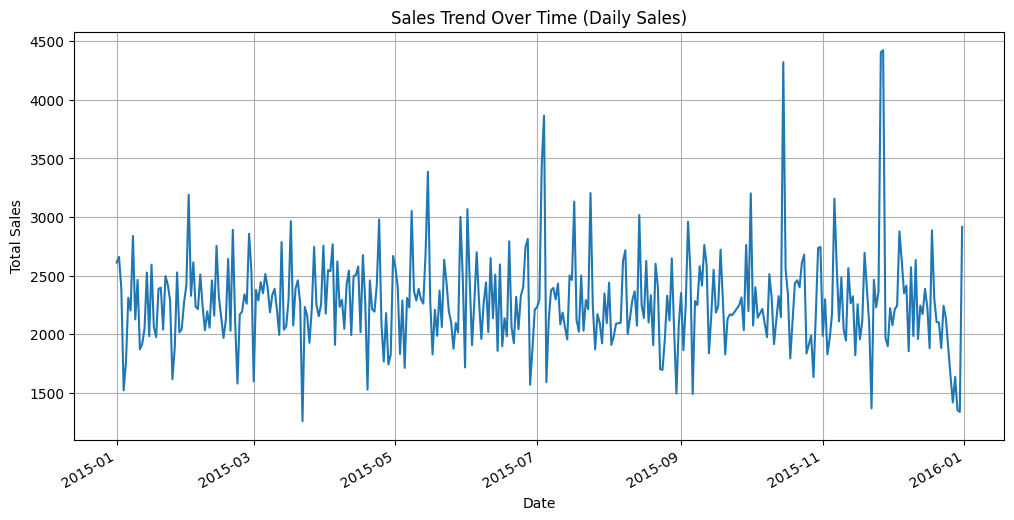

In [21]:
# Convert 'order_date' column to datetime format with day first
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')

# Check if there are any invalid dates after conversion
invalid_dates = df[df['order_date'].isnull()]

if not invalid_dates.empty:
    print("Invalid dates found:")
    print(invalid_dates)

# Proceed with daily sales analysis
daily_sales = df.groupby('order_date')['total_price'].sum()

plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title("Sales Trend Over Time (Daily Sales)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


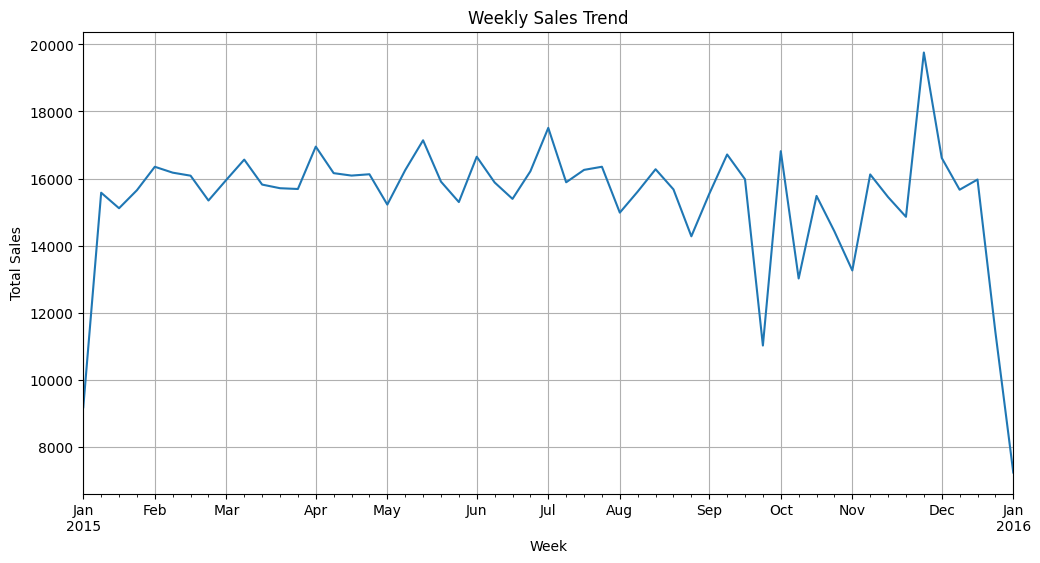

In [22]:
# 2. Weekly Sales Trend
weekly_sales = df.resample('W', on='order_date')['total_price'].sum()

plt.figure(figsize=(12, 6))
weekly_sales.plot()
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_12368\1731824850.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='order_date')['total_price'].sum()


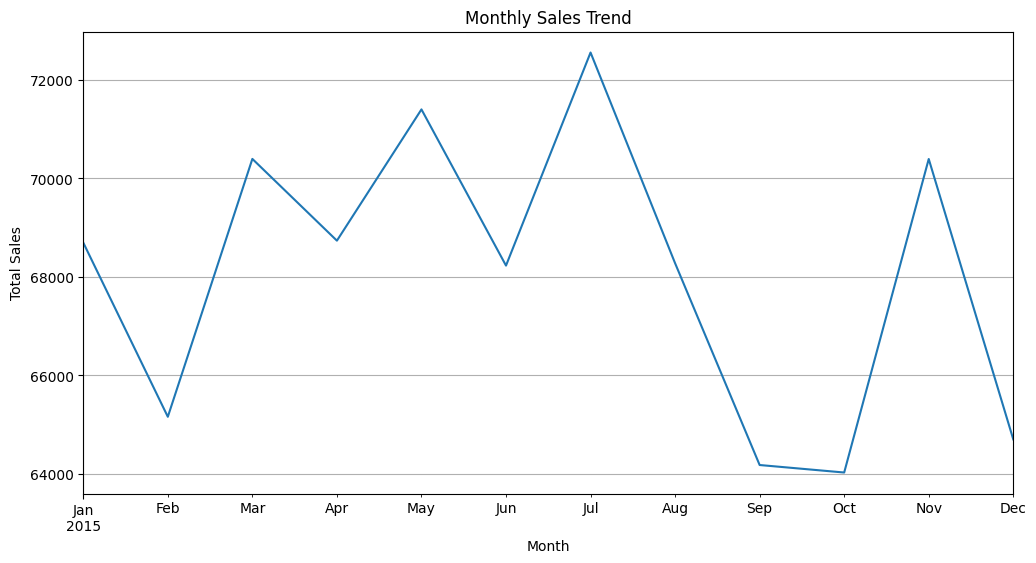

In [23]:
# 3. Monthly Sales Trend
monthly_sales = df.resample('M', on='order_date')['total_price'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

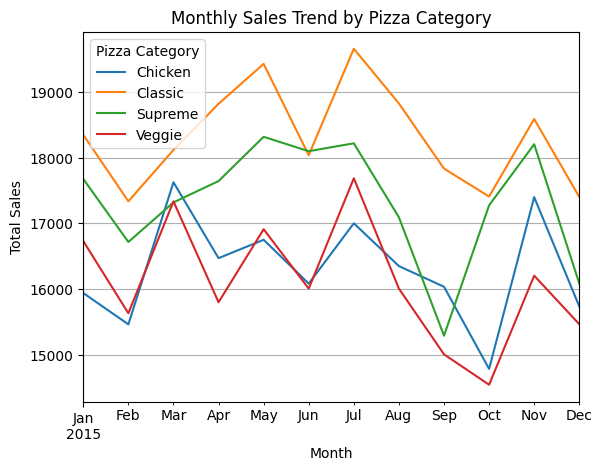

In [24]:
# 4. Trend by Pizza Category (Monthly)
monthly_category_sales = df.groupby([df['order_date'].dt.to_period('M'), 'pizza_category'])['total_price'].sum().unstack()

plt.figure(figsize=(12, 6))
monthly_category_sales.plot()
plt.title("Monthly Sales Trend by Pizza Category")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend(title="Pizza Category")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_12368\4213991981.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette="magma")


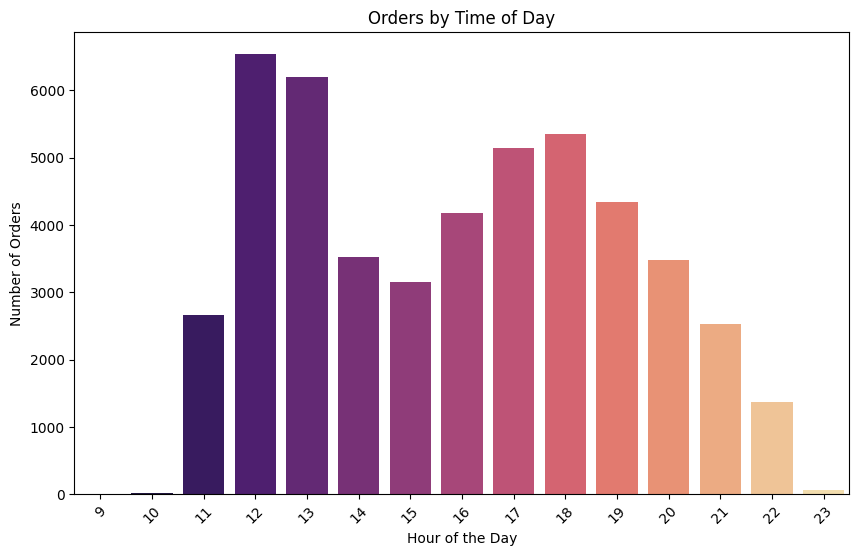

In [25]:
# Convert order_time to datetime
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.time

# 5. Orders by Time of Day (Binned into hourly intervals)
df['hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(10, 6))
orders_by_hour = df['hour'].value_counts().sort_index()
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette="magma")
plt.title("Orders by Time of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_12368\1661669982.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_size.index, y=sales_by_size.values, palette="YlGnBu")


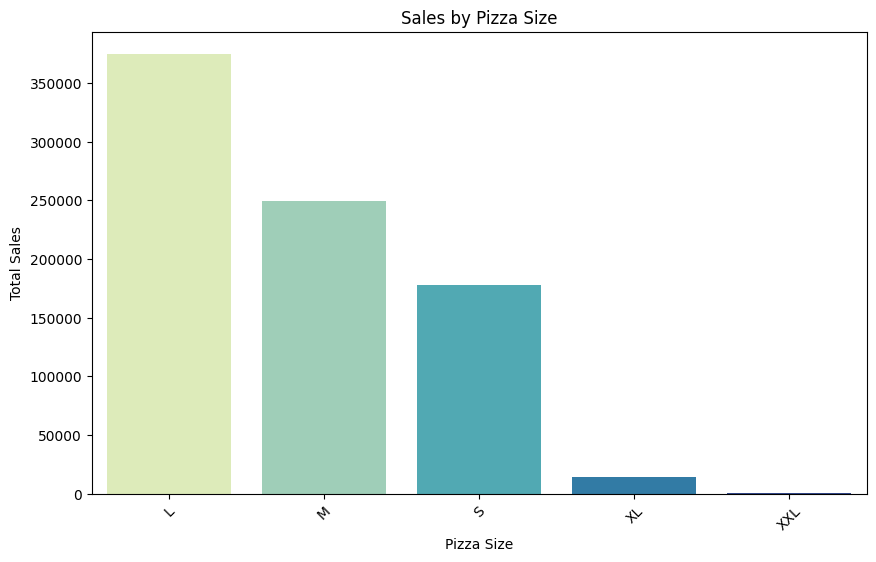

In [26]:
# 6. Sales by Pizza Size
plt.figure(figsize=(10, 6))
sales_by_size = df.groupby('pizza_size')['total_price'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_size.index, y=sales_by_size.values, palette="YlGnBu")
plt.title("Sales by Pizza Size")
plt.xlabel("Pizza Size")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_12368\3079883979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="coolwarm")


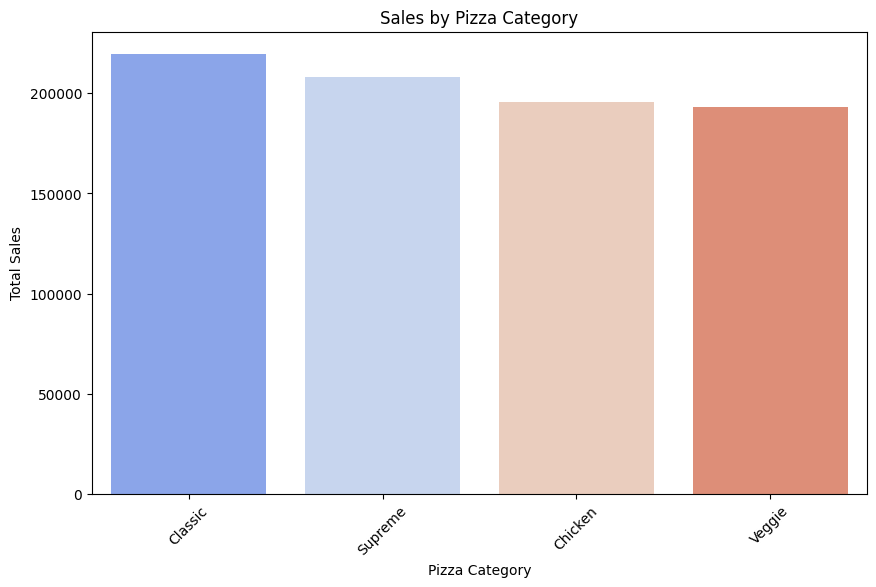

In [27]:
# 7. Sales by Pizza Category
plt.figure(figsize=(10, 6))
sales_by_category = df.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="coolwarm")
plt.title("Sales by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_12368\1905247635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_month.index, y=orders_by_month.values, palette="Blues")


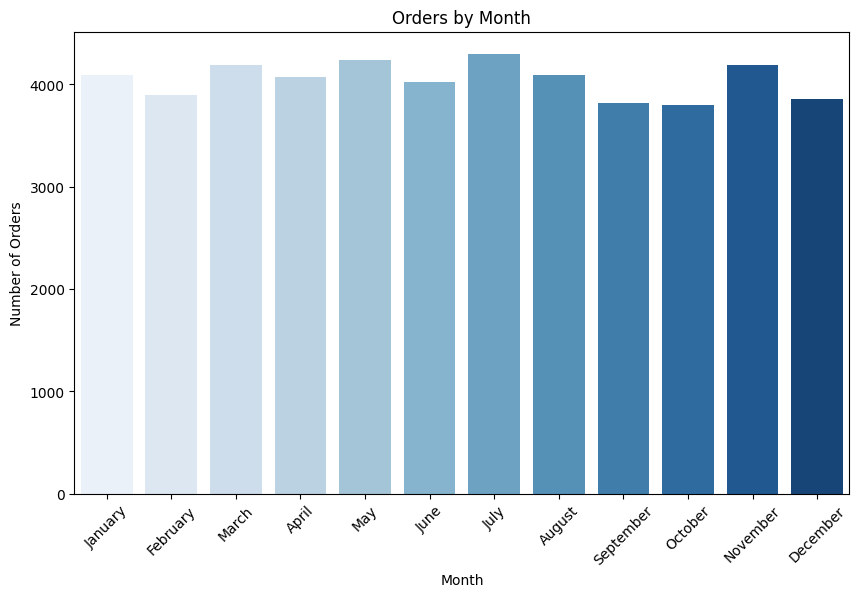

In [28]:
# 4. Orders by Month
df['month'] = df['order_date'].dt.month_name()

plt.figure(figsize=(10, 6))
orders_by_month = df['month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
sns.barplot(x=orders_by_month.index, y=orders_by_month.values, palette="Blues")
plt.title("Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_12368\200776600.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="Spectral")


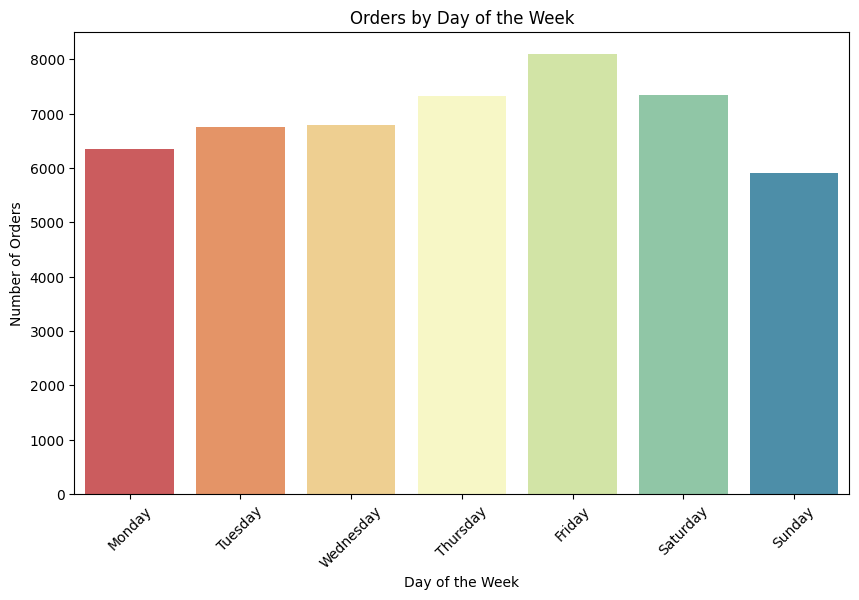

In [29]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# 3. Orders by Day of the Week
df['day_of_week'] = df['order_date'].dt.day_name()

plt.figure(figsize=(10, 6))
orders_by_day = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="Spectral")
plt.title("Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


# Sales Prediction

In [30]:
df=pd.read_csv(r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE PROJECT 5(Dominos)\pizza_final.csv')

In [31]:
# Ensure the 'order_date' is a datetime object
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)

# Feature: Convert 'month' and 'day_of_week' from 'order_date'
df['month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.dayofweek  # Monday=0, Sunday=6

# Feature: Create is_weekend based on the day_of_week
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Feature: Create is_holiday (define your list of holidays)
holidays = ['2015-12-25', '2015-01-26','2015-08-15','2015-01-01','2015-11-12']  # Add more holiday dates as needed
df['is_holiday'] = df['order_date'].isin(pd.to_datetime(holidays)).astype(int)

# Create Lagged Features
df['previous_day_sales'] = df['total_price'].shift(1)  # Previous day's total sales
df['previous_week_sales'] = df['total_price'].shift(7)  # Total sales from one week ago

# Example: Feature for promotional period (e.g., December and January)
df['promotional_period'] = ((df['month'] == 12) | (df['month'] == 1)).astype(int)

# Display the updated DataFrame info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48554 entries, 0 to 48553
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           48554 non-null  int64         
 1   pizza_id             48554 non-null  int64         
 2   order_id             48554 non-null  int64         
 3   pizza_name_id        48554 non-null  object        
 4   quantity             48554 non-null  int64         
 5   order_date           48554 non-null  datetime64[ns]
 6   order_time           48554 non-null  object        
 7   unit_price           48554 non-null  float64       
 8   total_price          48554 non-null  float64       
 9   pizza_size           48554 non-null  object        
 10  pizza_category       48554 non-null  object        
 11  pizza_ingredients    48554 non-null  object        
 12  pizza_name           48554 non-null  object        
 13  Items_Qty_In_Grams   48554 non-

MAPE: 13.84%


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


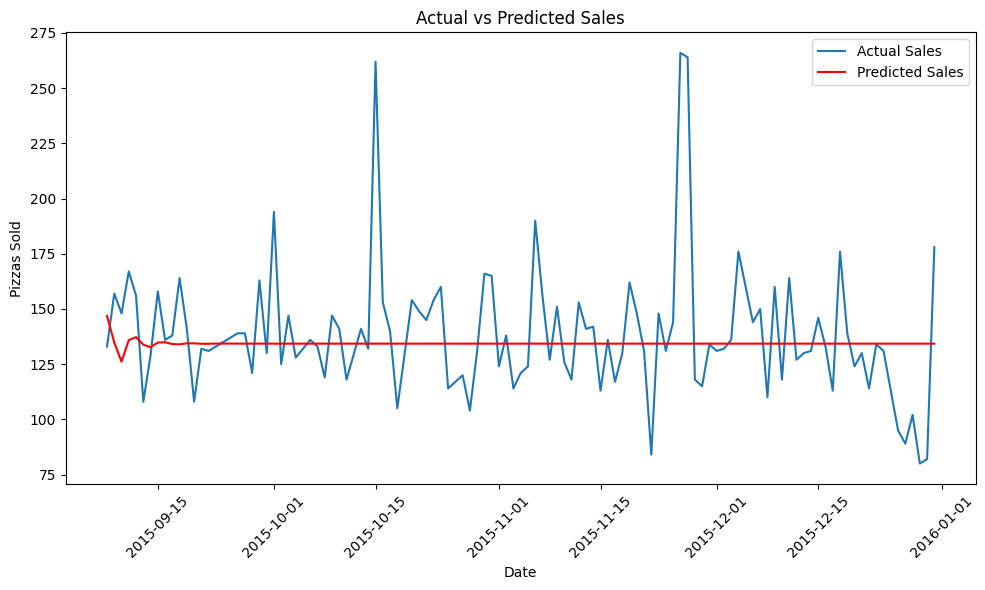

In [32]:
# Step 1: Aggregating daily sales data
# Aggregate sales by date
daily_sales = df.groupby('order_date')['quantity'].sum().reset_index()


# Ensure the order_date is the index
daily_sales.set_index('order_date', inplace=True)

# Step 2: Splitting data into train and test (70-30 split)
train_size = int(len(daily_sales) * 0.7)
train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]

# Step 3: Fitting the ARIMA model on training data
model = ARIMA(train_data, order=(3,1,0))
arima_model = model.fit()

# Step 4: Forecasting sales for the length of the test data
predictions = arima_model.forecast(steps=len(test_data))

# Step 5: Evaluating the model using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test_data, predictions)
print(f'MAPE: {mape * 100:.2f}%')

# Step 6: Visualizing Actual vs. Predicted Sales
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Actual Sales')
plt.plot(test_data.index, predictions, color='red', label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Pizzas Sold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# PURCHASE ORDER GENERATION

In [33]:
import pandas as pd

# Aggregate daily sales by summing quantities for each day
daily_sales = df.groupby('order_date')['quantity'].sum().reset_index()
daily_sales.set_index('order_date', inplace=True)


In [34]:
# Train-test split
train_size = int(len(daily_sales) * 0.8)
train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]

# Fit the ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  # Adjust (p, d, q) based on analysis
model_fit = model.fit()

# Forecast sales for the next 7 days
predicted_sales = model_fit.forecast(steps=7)


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

In [35]:
# Sum of forecasted pizza sales over the next week
total_pizzas_predicted = predicted_sales.sum()

# Extract unique ingredients and their quantities per pizza
ingredient_df = df[['pizza_name_id', 'pizza_ingredients', 'Items_Qty_In_Grams']].drop_duplicates()

# Assuming each ingredient's proportion in `Items_Qty_In_Grams` is evenly distributed
ingredient_df['ingredient_quantity_per_pizza'] = ingredient_df['Items_Qty_In_Grams'] / ingredient_df['pizza_ingredients'].str.split(',').apply(len)

# Calculate total quantity of each ingredient needed for predicted sales
ingredient_totals = {}
for _, row in ingredient_df.iterrows():
    ingredients = row['pizza_ingredients'].split(',')
    quantity_per_pizza = row['ingredient_quantity_per_pizza']
    for ingredient in ingredients:
        if ingredient in ingredient_totals:
            ingredient_totals[ingredient] += quantity_per_pizza * total_pizzas_predicted
        else:
            ingredient_totals[ingredient] = quantity_per_pizza * total_pizzas_predicted

# Convert to DataFrame
ingredient_totals_df = pd.DataFrame(list(ingredient_totals.items()), columns=['Ingredient', 'Quantity Needed (grams)'])


In [47]:
# Rename columns for clarity
purchase_order = ingredient_totals_df.rename(columns={'Ingredient': 'Item', 'Quantity Needed (grams)': 'Quantity Needed (in grams)'})

# Convert the quantity from grams to kilograms
purchase_order['Quantity Needed (in kg)'] = purchase_order['Quantity Needed (in grams)'] / 1000

# Display or save the purchase order
print(purchase_order)

# Optionally save to a CSV for record-keeping
purchase_order.to_csv('purchase_order.csv', index=False)



                   Item  Quantity Needed (in grams)  Quantity Needed (in kg)
0            Sliced Ham                33834.117680                33.834118
1             Pineapple               101502.353039               101.502353
2     Mozzarella Cheese               144734.836741               144.734837
3             Pepperoni                72179.451050                72.179451
4             Mushrooms               236838.823758               236.838824
..                  ...                         ...                      ...
68    Brie Carre Cheese                 5639.019613                 5.639020
69           Prosciutto                 5639.019613                 5.639020
70   Caramelized Onions                 5639.019613                 5.639020
71                Pears                 5639.019613                 5.639020
72                Thyme                 5639.019613                 5.639020

[73 rows x 3 columns]
